# 1. Introduction

# Libraries and Data importation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_parquet(r"C:\Users\mirko\Desktop\Curso Data Science DL\EDAHospDischarges_Chile2001-2024\data\processed\Discharges_2001-2024_analysis_finalversionV2.parquet")

# 2. Data Overview

# Shape of the dataset (rows, columns).

In [7]:
df.head()

,sex,age,health insurance,healthcare facility type,healthcare facility name,length of stay,discharge condition,primary diagnosis code,primary diagnosis name,year
0,Male,60-69,Fonasa,Private,Clínica Familia,2,Deceased,C780,tumor maligno secundario del pulmon,2001
1,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",58,Deceased,E145,"diabetes mellitus no especificada, con complic...",2001
2,Male,70-79,Fonasa,Public,"Hospital Del Salvador (Santiago, Providencia)",12,Deceased,J189,"neumonia, no especificada",2001
3,Male,1-9,Fonasa,Public,Instituto de Neurocirugía Dr. Alfonso Asenjo,1,Deceased,S065,hemorragia subdural traumatica,2001
4,Male,80-120,Fonasa,Public,Hospital Dr. Leonardo Guzmán (Antofagasta),7,Alive,K830,colangitis,2001


In [8]:
df.shape

(25758741, 10)

# Data dictionary / main variables (categorical, numerical).

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25758741 entries, 0 to 25758740
Data columns (total 10 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   sex                       category
 1   age                       category
 2   health insurance          category
 3   healthcare facility type  category
 4   healthcare facility name  object  
 5   length of stay            int32   
 6   discharge condition       category
 7   primary diagnosis code    object  
 8   primary diagnosis name    object  
 9   year                      int32   
dtypes: category(5), int32(2), object(3)
memory usage: 908.9+ MB


# Missing values / NA treatment summary.

In [13]:
df.isna().sum()

sex                         0
age                         0
health insurance            0
healthcare facility type    0
healthcare facility name    0
length of stay              0
discharge condition         0
primary diagnosis code      0
primary diagnosis name      0
year                        0
dtype: int64

The dataframe is completely clean without any missing value. For healthcare facility name the data was missing from 2021 to 2024 and healthcare facility type had around 20% of NaNs, mainly on year 2023. All these values were imputed to "Unknown" to preserve the rest of the data, considering it was not missing at random, so bias could be introduced in case of deletion. The rest of the variables had NaNs and were deleted becasue it did not affected the representativeness of the sample.

# First impressions after cleaning (anything noteworthy?).

It was complex to manage 24 dataframes and explore the data, particulary the missing values and take important decisions to ensure data integrity and accuracy at the same time. There are many duplicates and that is the main uncertainty about the realiability of the information, but it was chosen to just delete duplicates when the patient ID was available, making more evident that some rows were real duplicates. There are many health problems that are highly prevalent and common among specific kind of patients, so it would not be surprising that similar rows are different discharges even if they are completely identical and no ID is available.

# 3. Univariate Analysis

In [18]:
df.columns

Index(['sex', 'age', 'health insurance', 'healthcare facility type',
       'healthcare facility name', 'length of stay', 'discharge condition',
       'primary diagnosis code', 'primary diagnosis name', 'year'],
      dtype='object')

# Categorical variables (4)

# Sex

In [21]:
df.sex.value_counts()

sex
Male      13290560
Female    12468181
Name: count, dtype: int64

In [22]:
df.sex.value_counts(normalize = True)*100

sex
Male      51.596311
Female    48.403689
Name: proportion, dtype: float64

In [23]:
df["sex"] = df["sex"].cat.rename_categories({"Hombre": "Male", "Mujer": "Female"})


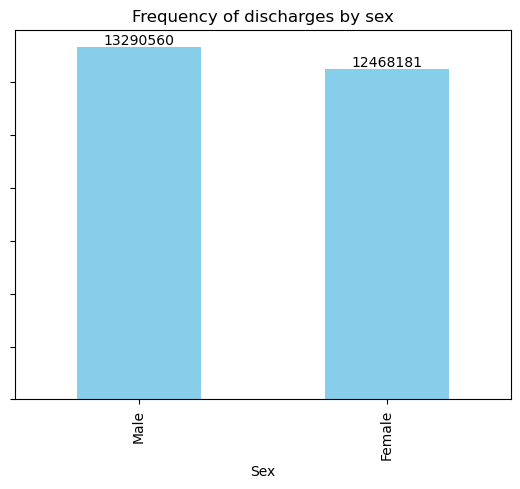

In [24]:
# Get value counts
counts = df['sex'].value_counts()

# Plot bar chart
ax = counts.plot(kind='bar', color='skyblue')

# Add counts on top of each bar
for i, count in enumerate(counts):
    ax.text(i, count + 0.05, str(count), ha='center', va='bottom')

plt.xlabel('Sex')
plt.ylabel(None)
plt.title('Frequency of discharges by sex')
plt.tick_params(labelleft=False)
plt.show()


# Health insurance

In [26]:
df["health insurance"].value_counts()

health insurance
Fonasa    20688143
Isapre     5070598
Name: count, dtype: int64

In [27]:
df["health insurance"].value_counts(normalize = True)*100

health insurance
Fonasa    80.315039
Isapre    19.684961
Name: proportion, dtype: float64

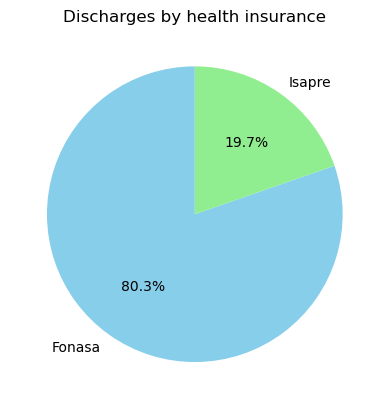

In [28]:
# Get value counts
counts = df['health insurance'].value_counts()

# Plot pie chart with percentages
counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
plt.ylabel('')  # Remove default y-label
plt.title('Discharges by health insurance')
plt.show()


# Healthcare facility type

In [30]:
df["healthcare facility type"].value_counts()

healthcare facility type
Public     17489355
Private     7050600
Unknown     1218786
Name: count, dtype: int64

In [31]:
df["healthcare facility type"].value_counts(normalize = True)*100

healthcare facility type
Public     67.896777
Private    27.371679
Unknown     4.731543
Name: proportion, dtype: float64

In [32]:
df.groupby("healthcare facility type", observed=False)["healthcare facility name"].nunique()

healthcare facility type
Private    259
Public     217
Unknown      1
Name: healthcare facility name, dtype: int64

In [33]:
df["healthcare facility type"] = df["healthcare facility type"].cat.rename_categories({"Publico": "Public", "Privado": "Private"})

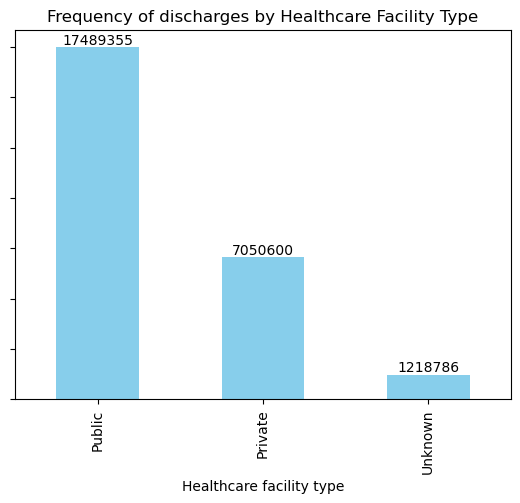

In [34]:
# Get value counts
counts = df['healthcare facility type'].value_counts()

# Plot bar chart
ax = counts.plot(kind='bar', color='skyblue')

# Add counts on top of each bar
for i, count in enumerate(counts):
    ax.text(i, count + 0.05, str(count), ha='center', va='bottom')

plt.xlabel('Healthcare facility type')
plt.ylabel(None)
plt.title('Frequency of discharges by Healthcare Facility Type')
plt.tick_params(labelleft=False)
plt.show()


# Discharge Condition

In [36]:
df["discharge condition"].value_counts()

discharge condition
Alive       25029231
Deceased      729510
Name: count, dtype: int64

In [37]:
df["discharge condition"].value_counts(normalize = True)*100

discharge condition
Alive       97.167913
Deceased     2.832087
Name: proportion, dtype: float64

In [38]:
df["discharge condition"] = df["discharge condition"].cat.rename_categories({"Vivo": "Alive", "Muerto": "Deceased"})

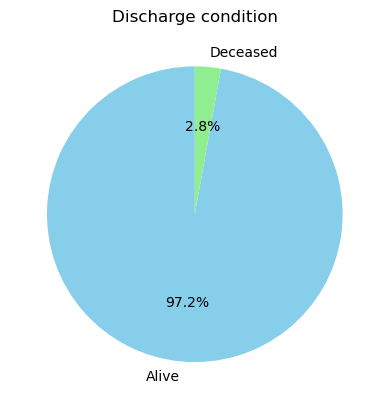

In [39]:
# Get value counts
condition_counts = df['discharge condition'].value_counts()

# Plot pie chart with percentages
condition_counts.plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=90)
plt.ylabel('')  # Remove default y-label
plt.title('Discharge condition')
plt.show()


In [40]:
df.columns

Index(['sex', 'age', 'health insurance', 'healthcare facility type',
       'healthcare facility name', 'length of stay', 'discharge condition',
       'primary diagnosis code', 'primary diagnosis name', 'year'],
      dtype='object')

# Age

In [42]:
#df['age'] = pd.DataFrame(df['age'].tolist()).astype(str).agg('-'.join, axis=1)

In [43]:
# Assuming df['age_range'] is already the string labels "30-39", "40-49", etc.
#age_categories = ["0-1", "1-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-120"]

# Convert to ordered categorical
#df['age'] = pd.Categorical(df['age'], categories=age_categories, ordered=True)

In [44]:
#df.info()

In [45]:
#df.to_parquet("Discharges_2001-2024_analysis_finalversionV2.parquet", index=False)

In [46]:
# Frequency distribution of age ranges
age_counts = df['age'].value_counts().sort_index()
print(age_counts)

age
0-1       2159003
1-9       2127170
10-19     1933405
20-29     2085958
30-39     2658631
40-49     3133982
50-59     3304514
60-69     3400000
70-79     2938127
80-120    2017951
Name: count, dtype: int64


In [47]:
percentages = age_counts / age_counts.sum() * 100
print(percentages)


age
0-1        8.381632
1-9        8.258051
10-19      7.505821
20-29      8.098059
30-39     10.321277
40-49     12.166674
50-59     12.828709
60-69     13.199403
70-79     11.406330
80-120     7.834044
Name: count, dtype: float64


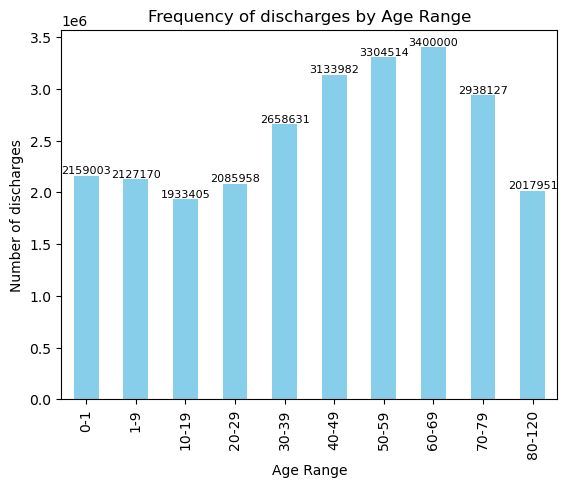

In [48]:
ax = age_counts.plot(kind="bar", color="skyblue")

# Add counts on bars
for i, count in enumerate(age_counts):
    ax.text(i, count + 0.05, str(count), fontsize = 8, ha="center", va="bottom")

plt.xlabel("Age Range")
plt.ylabel("Number of discharges")
plt.title("Frequency of discharges by Age Range")
plt.show()


# Healthcare Facility Name

In [50]:
hospital_names_20012020 = df['healthcare facility name'][df['healthcare facility name']!= "Unknown"]

In [51]:
hospital_names_20012020

0                                        Clínica Familia 
1           Hospital Del Salvador (Santiago, Providencia)
2           Hospital Del Salvador (Santiago, Providencia)
3            Instituto de Neurocirugía Dr. Alfonso Asenjo
4              Hospital Dr. Leonardo Guzmán (Antofagasta)
                                ...                      
20788758                              Clínica Las Condes 
20788759                                 Clínica Alemana 
20788760                                 Clínica Alemana 
20788761                 Hospital Base San José de Osorno
20788762                 Hospital Base San José de Osorno
Name: healthcare facility name, Length: 20788763, dtype: object

In [52]:
hospital_counts_top15 = hospital_names_20012020.value_counts().head(15)
print(hospital_counts_top15)

healthcare facility name
Complejo Hospitalario Dr. Sótero del Río (Santiago, Puente Alto)        545983
Hospital Clínico Regional Dr. Guillermo Grant Benavente (Concepción)    534799
Hospital Dr. Hernán Henríquez Aravena (Temuco)                          421631
Hospital Barros Luco Trudeau (Santiago, San Miguel)                     388789
Clínica Dávila                                                          375298
Hospital Carlos Van Buren (Valparaíso)                                  365457
Hospital Clínico Universidad de Chile                                   347567
Clínica Alemana                                                         347469
Hospital Clínico San Borja-Arriarán (Santiago, Santiago)                340760
Hospital Clínico Universidad Católica                                   334588
Hospital Dr. Gustavo Fricke (Viña del Mar)                              325660
Clínica Santa María                                                     321470
Complejo Asistencial Dr. Ví

In [56]:
print(hospital_counts_top15.sum())

5599537


In [57]:
hospital_counts_tail15 = hospital_names_20012020.value_counts().tail(15).sum()
print(hospital_counts_tail15)

94


In [58]:
hospital_pct = hospital_counts_top15 / hospital_counts_top15.sum() * 100
print(hospital_pct)

healthcare facility name
Complejo Hospitalario Dr. Sótero del Río (Santiago, Puente Alto)        9.750503
Hospital Clínico Regional Dr. Guillermo Grant Benavente (Concepción)    9.550772
Hospital Dr. Hernán Henríquez Aravena (Temuco)                          7.529748
Hospital Barros Luco Trudeau (Santiago, San Miguel)                     6.943235
Clínica Dávila                                                          6.702304
Hospital Carlos Van Buren (Valparaíso)                                  6.526557
Hospital Clínico Universidad de Chile                                   6.207067
Clínica Alemana                                                         6.205317
Hospital Clínico San Borja-Arriarán (Santiago, Santiago)                6.085503
Hospital Clínico Universidad Católica                                   5.975280
Hospital Dr. Gustavo Fricke (Viña del Mar)                              5.815838
Clínica Santa María                                                     5.741010
Com

In [60]:
# Top 15 hospitals account for 27% of discharges, while the remaining hospitals (“Other”) represent 73% of total discharges.

C:\Users\mirko\AppData\Local\Temp\ipykernel_3576\1368786341.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = df.groupby(['hospital_grouped', 'healthcare facility type']).size().unstack(fill_value=0)
C:\Users\mirko\AppData\Local\Temp\ipykernel_3576\1368786341.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, total + 5, f'{plot_percent[i]:.1f}%', ha='center', va='bottom', fontsize=10)


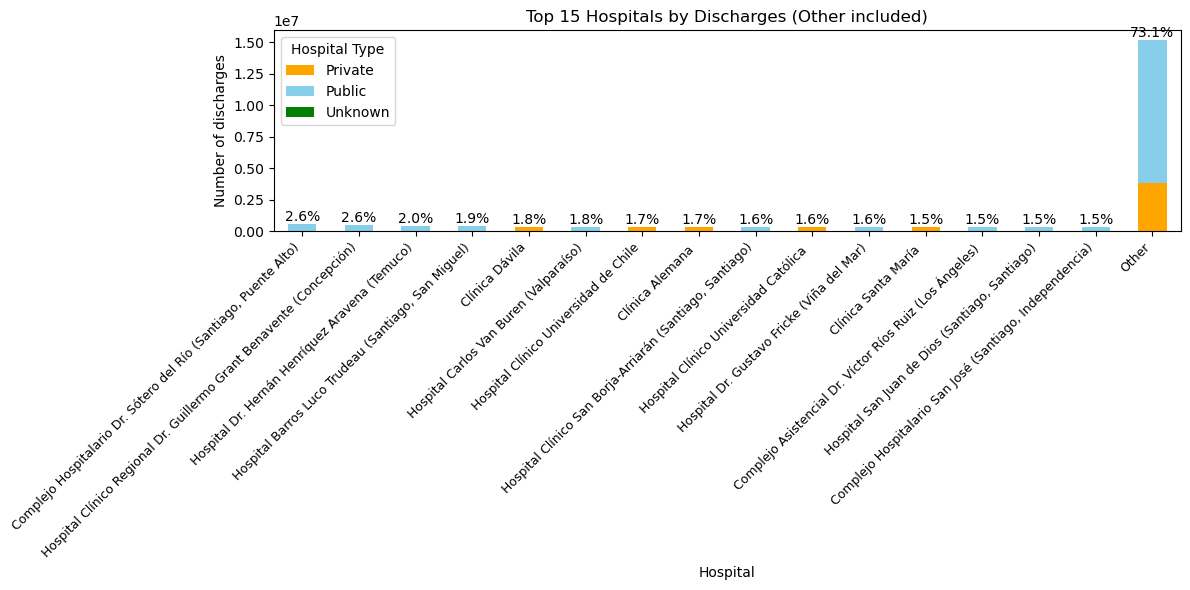

In [61]:
# Compute hospital counts
hospital_counts = hospital_names_20012020.value_counts()

# Identify top 15 hospitals
top_hospitals = hospital_counts.head(15).index.tolist()

# Create a new column for plotting: keep top 15, collapse rest into 'Other'
df['hospital_grouped'] = hospital_names_20012020.where(hospital_names_20012020.isin(top_hospitals), 'Other')


# Group by hospital_grouped and hospital type
plot_data = df.groupby(['hospital_grouped', 'healthcare facility type']).size().unstack(fill_value=0)

# Compute percentages
plot_percent = plot_data / plot_data.sum() * 100

# Plot stacked bar chart
# Keep the order: top 15 + Other
order = top_hospitals + ['Other']
order = [x for x in order if x in plot_data.index]  # ensure no duplicates
plot_data = plot_data.loc[order]

# Define colors for hospital types
colors = []
for col in plot_data.columns:
    if col == 'Public':
        colors.append('skyblue')
    elif col == 'Private':
        colors.append('orange')
    elif col == 'Unknown':
        colors.append('green')  # Unknown in green
    else:
        colors.append('lightgrey')  # fallback color

# Plot stacked bar chart with these colors
ax = plot_data.plot(kind='bar', stacked=True, figsize=(12,6), color=colors)
plt.ylabel('Number of discharges')
plt.xlabel('Hospital')
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.title('Top 15 Hospitals by Discharges (Other included)')
plt.legend(title='Hospital Type')

# Compute totals per hospital (sum across hospital types if stacked)
totals = plot_data.sum(axis=1)

# Recompute percentages
plot_percent = totals / totals.sum() * 100

# Annotate percentages on top of bars
for i, total in enumerate(totals):
    ax.text(i, total + 5, f'{plot_percent[i]:.1f}%', ha='center', va='bottom', fontsize=10)


plt.tight_layout()
plt.show()

In [107]:
df.drop(columns = ["hospital_grouped"], inplace = True)

# Length of stay

# 1. Basic Overview

In [113]:
df["length of stay"].dtype

dtype('int32')

In [115]:
df["length of stay"].describe()

count    2.575874e+07
mean     6.756565e+00
std      5.994416e+01
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      7.000000e+00
max      3.245200e+04
Name: length of stay, dtype: float64

# 2. Distribution

In [ ]:
print("Mean:", df['length_of_stay'].mean())
print("Median:", df['length_of_stay'].median())
print("Mode:", df['length_of_stay'].mode()[0])
print("Std Dev:", df['length_of_stay'].std())
print("Range:", df['length_of_stay'].max() - df['length_of_stay'].min())


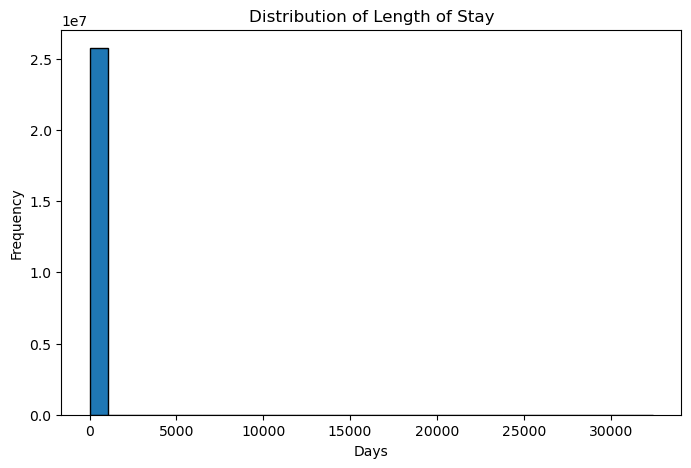

In [118]:
plt.figure(figsize=(8,5))
df['length of stay'].plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribution of Length of Stay")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

In [120]:
df_LOS_hist = df['length of stay'][df['length of stay'] <= 30]

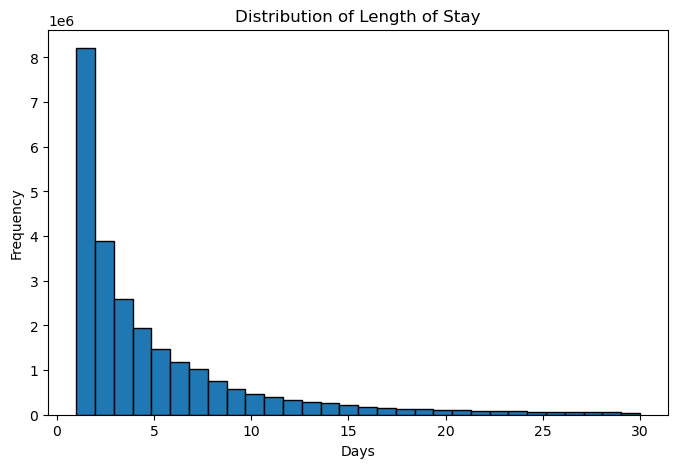

In [122]:
plt.figure(figsize=(8,5))
df_LOS_hist.plot(kind='hist', bins=30, edgecolor='black')
plt.title("Distribution of Length of Stay")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

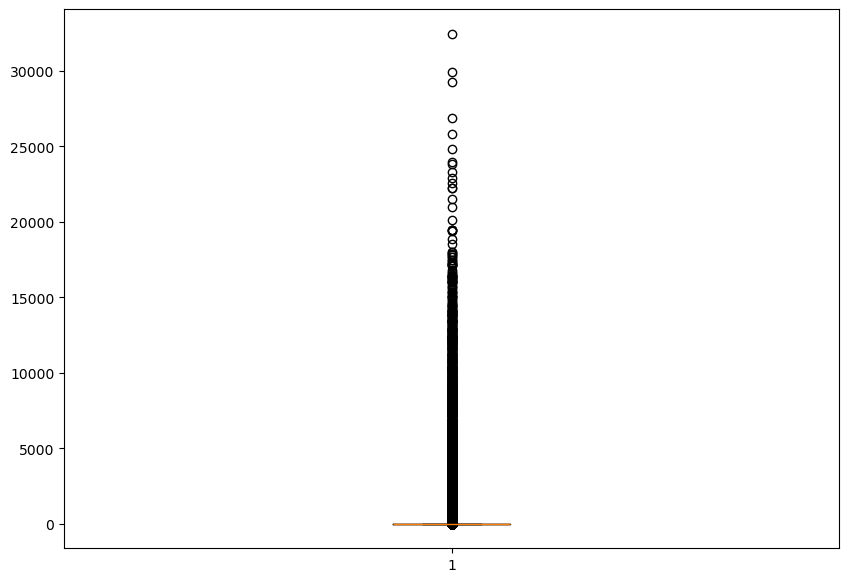

In [134]:
fig = plt.figure(figsize =(10, 7))

plt.boxplot(df["length of stay"])
plt.show()

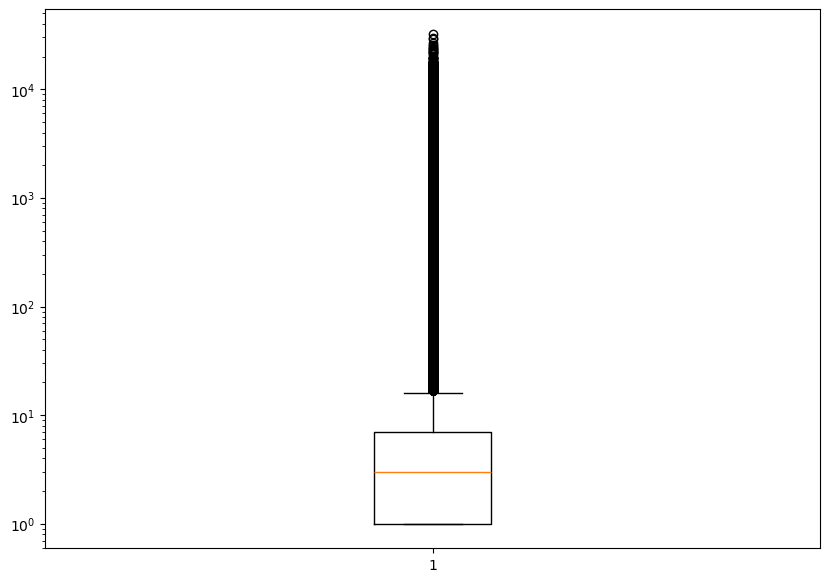

0.25     1.0
0.50     3.0
0.75     7.0
0.95    22.0
0.99    53.0
Name: length of stay, dtype: float64


In [138]:
fig = plt.figure(figsize =(10, 7))

plt.boxplot(df["length of stay"])
plt.yscale('log')
plt.show()

# Quantiles
print(df['length of stay'].quantile([0.25, 0.5, 0.75, 0.95, 0.99]))

In [176]:
df_LOS_box = df['length of stay'][df['length of stay'] <= 22]

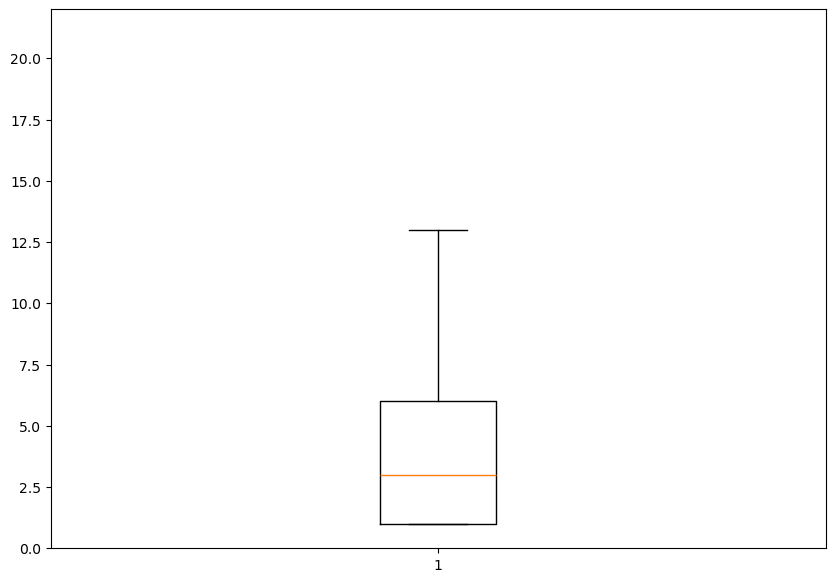

In [186]:
fig = plt.figure(figsize =(10, 7))

plt.boxplot(df_LOS_box, showfliers=False)
plt.ylim(0,22)
plt.show()

# 3. Outliers analysis

In [148]:
limit_99 = df['length of stay'].quantile(0.99)
limit_95 = df['length of stay'].quantile(0.95)

In [174]:
print("Amount of discharges whose length of stay is over percentile 99 (53 days): ",len(df['length of stay'][df['length of stay'] > limit_99]))

Amount of discharges whose length of stay is over percentile 99 (53 days):  256528


In [172]:
print("Amount of discharges whose length of stay is over percentile 95 (22 days): ",len(df['length of stay'][df['length of stay'] > limit_95]))

Amount of discharges whose length of stay is over percentile 95 (22 days):  1229838


In [188]:
# Drop missing values
los = df['length of stay'].dropna()

# Compute quartiles
Q1 = los.quantile(0.25)
Q3 = los.quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")


Q1: 1.0, Q3: 7.0, IQR: 6.0


In [190]:
# Lower and upper thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

print(f"Lower threshold: {lower_threshold}")
print(f"Upper threshold: {upper_threshold}")


Lower threshold: -8.0
Upper threshold: 16.0


In [192]:
outliers = los[(los < lower_threshold) | (los > upper_threshold)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 1969208


In [194]:
pct_outliers = len(outliers) / len(los) * 100
print(f"Percentage of outliers: {pct_outliers:.2f}%")


Percentage of outliers: 7.64%


# Bivariate and Multivariate Analysis

# Guiding Questions

# Visualizations

# Insights and questions

1. How the distribution of the data is affected if healthy newborns are not considered in the analysis?

In [40]:
df.columns

Index(['Sex', 'Age', 'Health insurance', 'Healthcare facility type',
       'Healthcare facility name', 'Length of stay', 'Discharge condition',
       'Primary diagnosis code', 'Primary diagnosis name', 'Year'],
      dtype='object')